In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import files

In [2]:
uploaded = files.upload()

Saving dataset_financiero.csv to dataset_financiero (5).csv


In [3]:
df = pd.read_csv("dataset_financiero.csv")

In [4]:
x = df.drop(columns=["Fecha", "Tendencia"])
y = df["Tendencia"]
cat_cols = ["Sentimiento", "EstadoDolar", "ActivoRef"]
x_encoded = pd.get_dummies(x, columns=cat_cols, drop_first=True)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)
y_encoded = LabelEncoder().fit_transform(y)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy' )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history_loss = model.fit(x_train, y_train,epochs=100, verbose=0)

In [8]:
pred = scaler.transform(([[110, 3500, 1, 0, 1, 0, 1]]))
y_pred = model.predict(pred)
y_pred.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.]], dtype=float32)

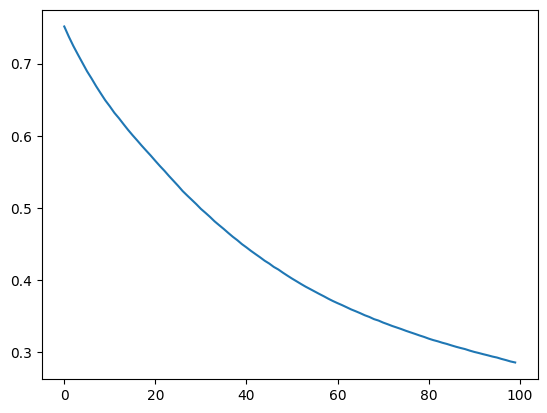

In [9]:
plt.plot(history_loss.history['loss'])
plt.show()